# Retail Sales Analysis and Forecasting
An intermediate-level data analysis project using Python.


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Step 2: Load Data (Simulated for demonstration)
data = {
    'Order ID': range(1, 101),
    'Date': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'Store': np.random.choice(['Store A', 'Store B', 'Store C'], 100),
    'Product': np.random.choice(['Widget', 'Gadget', 'Doohickey'], 100),
    'Category': np.random.choice(['Electronics', 'Furniture', 'Office Supplies'], 100),
    'Quantity Sold': np.random.randint(1, 10, size=100),
    'Unit Price': np.random.uniform(10.0, 100.0, size=100),
    'Customer Segment': np.random.choice(['Consumer', 'Corporate', 'Home Office'], 100),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 100)
}
df = pd.DataFrame(data)
df['Total Sales'] = df['Quantity Sold'] * df['Unit Price']

In [3]:
# Step 3: Preprocess Data
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

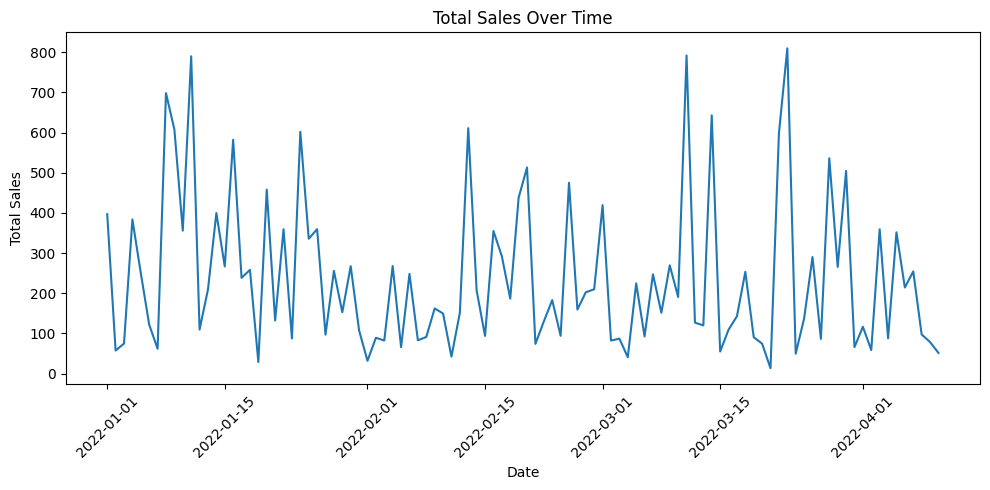


Top Products by Sales:
 Product
Gadget       9958.027688
Widget       7201.227634
Doohickey    6879.200561
Name: Total Sales, dtype: float64


In [4]:
# Step 4: Exploratory Data Analysis
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Total Sales')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top Products
top_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
print("\nTop Products by Sales:\n", top_products)

C:\Users\H P\AppData\Local\Temp\ipykernel_5400\3229444642.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Date').resample('M')['Total Sales'].sum()
C:\Users\H P\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\H P\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting p

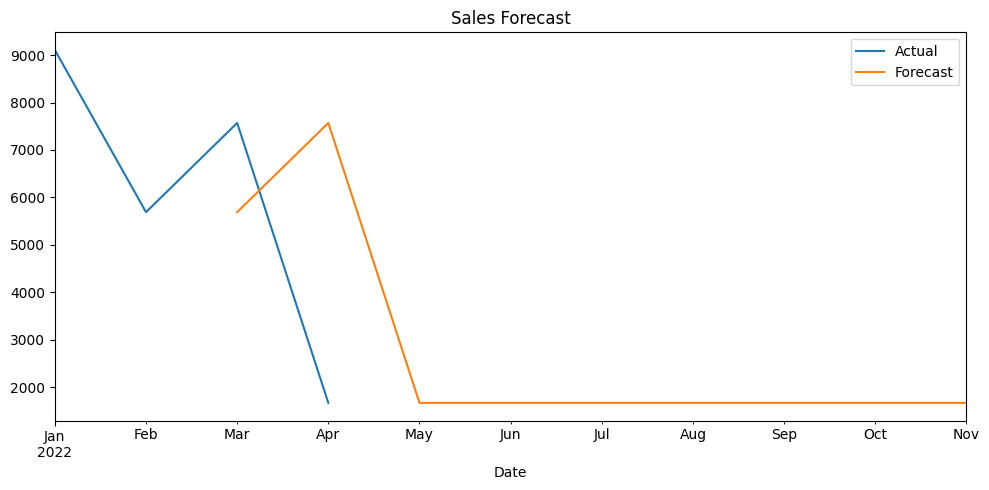

In [5]:
# Step 5: Time Series Forecasting
monthly_sales = df.set_index('Date').resample('M')['Total Sales'].sum()
model = SARIMAX(monthly_sales, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)
forecast = results.predict(start=len(monthly_sales)-6, end=len(monthly_sales)+6)

plt.figure(figsize=(10,5))
monthly_sales.plot(label='Actual')
forecast.plot(label='Forecast')
plt.title('Sales Forecast')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
# Step 6: Linear Regression Model
X = df[['Month', 'Quantity Sold']]
y = df['Total Sales']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"\nLinear Regression RMSE: {rmse:.2f}")


Linear Regression RMSE: 129.12
